# Analyzing the Impact of Development Indicators on CO₂ Emissions: A Data Science and Low-Code Approach

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df_wb = pd.read_excel("WorldData.xlsx")

df_wb.rename(columns={"2023 [YR2023]": "value"}, inplace=True)

df_wb['value'] = pd.to_numeric(df_wb['value'], errors='coerce')

df = df_wb.pivot_table(
    index=["Country Name", "Country Code"],
    columns="Series Name",
    values="value",
    aggfunc='mean'  
).reset_index()

df.head()

Series Name,Country Name,Country Code,Access to electricity (% of population),Current health expenditure (% of GDP),GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),"School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,85.300000,NaN,413.757895,17.7,66.035000,NaN,2.135594,NaN,13.991000
1,Africa Eastern and Southern,AFE,50.668330,NaN,1568.159891,NaN,65.146291,73.275108,2.520818,NaN,7.806365
2,Africa Western and Central,AFW,57.069267,NaN,1599.392983,NaN,58.855722,60.505550,2.386204,46.629440,3.277245
3,Albania,ALB,100.000000,NaN,8575.171346,83.1,79.602000,NaN,-1.148418,96.136879,10.108000
4,Algeria,DZA,100.000000,NaN,5364.027950,76.9,76.261000,NaN,1.498976,102.702148,11.701000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         265 non-null    object 
 1   Country Code                                                         265 non-null    object 
 2   Access to electricity (% of population)                              263 non-null    float64
 3   Current health expenditure (% of GDP)                                21 non-null     float64
 4   GDP per capita (current US$)                                         249 non-null    float64
 5   Individuals using the Internet (% of population)                     186 non-null    float64
 6   Life expectancy at birth, total (years)                              265 non-null    float64
 7   Literacy

In [4]:
co2_df = pd.read_excel("co2data.xlsx")

co2_df = co2_df[co2_df['iso_code'].str.len() == 3]

df1 = co2_df[co2_df['year'] == 2022].copy()

df1 = df1[['country', 'iso_code', 'co2', 'co2_per_capita', 'population', 'gdp']]

df1.rename(columns={
    'country': 'Country Name',
    'iso_code': 'Country Code',
    'co2': 'CO2 Emissions (million tonnes)',
    'co2_per_capita': 'CO2 Emissions per Capita',
    'gdp': 'GDP (CO2 dataset)'
}, inplace=True)

In [5]:
df1.head()

,Country Name,Country Code,CO2 Emissions (million tonnes),CO2 Emissions per Capita,population,GDP (CO2 dataset)
272,Afghanistan,AFG,10.558,0.260,40578846.0,5.330347e+10
894,Albania,ALB,5.173,1.830,2827615.0,3.617101e+10
1068,Algeria,DZA,184.558,4.058,45477391.0,5.958200e+11
1342,Andorra,AND,0.420,5.263,79722.0,NaN
1516,Angola,AGO,20.250,0.568,35635028.0,1.583460e+11


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 272 to 50189
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    218 non-null    object 
 1   Country Code                    218 non-null    object 
 2   CO2 Emissions (million tonnes)  215 non-null    float64
 3   CO2 Emissions per Capita        213 non-null    float64
 4   population                      216 non-null    float64
 5   GDP (CO2 dataset)               164 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [7]:
df_final = pd.merge(df, df1, on='Country Code', how='left')
df_final=df_final.rename(columns={'Country Name_x':'Country Name'})
df_final.head()

,Country Name,Country Code,Access to electricity (% of population),Current health expenditure (% of GDP),GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),"School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Country Name_y,CO2 Emissions (million tonnes),CO2 Emissions per Capita,population,GDP (CO2 dataset)
0,Afghanistan,AFG,85.300000,NaN,413.757895,17.7,66.035000,NaN,2.135594,NaN,13.991000,Afghanistan,10.558,0.260,40578846.0,5.330347e+10
1,Africa Eastern and Southern,AFE,50.668330,NaN,1568.159891,NaN,65.146291,73.275108,2.520818,NaN,7.806365,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,AFW,57.069267,NaN,1599.392983,NaN,58.855722,60.505550,2.386204,46.629440,3.277245,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,100.000000,NaN,8575.171346,83.1,79.602000,NaN,-1.148418,96.136879,10.108000,Albania,5.173,1.830,2827615.0,3.617101e+10
4,Algeria,DZA,100.000000,NaN,5364.027950,76.9,76.261000,NaN,1.498976,102.702148,11.701000,Algeria,184.558,4.058,45477391.0,5.958200e+11


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         265 non-null    object 
 1   Country Code                                                         265 non-null    object 
 2   Access to electricity (% of population)                              263 non-null    float64
 3   Current health expenditure (% of GDP)                                21 non-null     float64
 4   GDP per capita (current US$)                                         249 non-null    float64
 5   Individuals using the Internet (% of population)                     186 non-null    float64
 6   Life expectancy at birth, total (years)                              265 non-null    float64
 7   Literacy

# Data Cleaning

In [9]:
df_final = df_final.drop(columns=[
    'Current health expenditure (% of GDP)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Country Name_y'
])

In [10]:
fill_median_cols = [
    'Access to electricity (% of population)',
    'GDP per capita (current US$)',
    'Individuals using the Internet (% of population)',
    'School enrollment, secondary (% gross)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'CO2 Emissions (million tonnes)',
    'CO2 Emissions per Capita',
    'population',
    'GDP (CO2 dataset)'
]

for col in fill_median_cols:
    df_final[col].fillna(df_final[col].median(), inplace=True)


C:\Users\bushr\AppData\Local\Temp\ipykernel_26484\2753351238.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[col].median(), inplace=True)


In [11]:
df_final.isnull().sum()

Country Name                                                           0
Country Code                                                           0
Access to electricity (% of population)                                0
GDP per capita (current US$)                                           0
Individuals using the Internet (% of population)                       0
Life expectancy at birth, total (years)                                0
Population growth (annual %)                                           0
School enrollment, secondary (% gross)                                 0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
CO2 Emissions (million tonnes)                                         0
CO2 Emissions per Capita                                               0
population                                                             0
GDP (CO2 dataset)                                                      0
dtype: int64

In [12]:
df_final.head()

,Country Name,Country Code,Access to electricity (% of population),GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Population growth (annual %),"School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)",CO2 Emissions (million tonnes),CO2 Emissions per Capita,population,GDP (CO2 dataset)
0,Afghanistan,AFG,85.300000,413.757895,17.7,66.035000,2.135594,88.660211,13.991000,10.558,0.2600,40578846.0,5.330347e+10
1,Africa Eastern and Southern,AFE,50.668330,1568.159891,80.8,65.146291,2.520818,88.660211,7.806365,11.355,2.8655,7348056.0,9.928183e+10
2,Africa Western and Central,AFW,57.069267,1599.392983,80.8,58.855722,2.386204,46.629440,3.277245,11.355,2.8655,7348056.0,9.928183e+10
3,Albania,ALB,100.000000,8575.171346,83.1,79.602000,-1.148418,96.136879,10.108000,5.173,1.8300,2827615.0,3.617101e+10
4,Algeria,DZA,100.000000,5364.027950,76.9,76.261000,1.498976,102.702148,11.701000,184.558,4.0580,45477391.0,5.958200e+11


# Exploratory Data Analysis

In [13]:
df_final.describe()

,Access to electricity (% of population),GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Population growth (annual %),"School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)",CO2 Emissions (million tonnes),CO2 Emissions per Capita,population,GDP (CO2 dataset)
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,2.650000e+02,2.650000e+02
mean,87.919547,19129.797185,74.596226,73.458764,1.123850,85.466416,6.429528,138.428709,4.136315,3.178471e+07,5.251275e+11
std,21.731200,30043.389730,20.818892,6.960697,1.523458,15.629785,4.738363,795.255992,4.812677,1.290605e+08,2.206226e+12
min,5.400000,192.074305,11.100000,54.462000,-8.423008,3.293810,0.130000,0.011000,0.031000,1.001200e+04,6.750980e+08
25%,88.300000,2554.673049,72.400000,68.337000,0.284259,88.660211,3.840738,4.309000,1.305000,2.827615e+06,6.513659e+10
50%,100.000000,7826.353765,80.800000,73.844000,1.021952,88.660211,5.183500,11.355000,2.865500,7.348056e+06,9.928183e+10
75%,100.000000,22600.450230,86.800000,78.473171,2.098389,88.660211,7.335000,36.367000,4.564000,1.790442e+07,1.773550e+11
max,100.000000,256580.515123,100.000000,86.372000,6.527050,123.987738,35.086000,11350.538000,36.699000,1.425423e+09,2.696600e+13


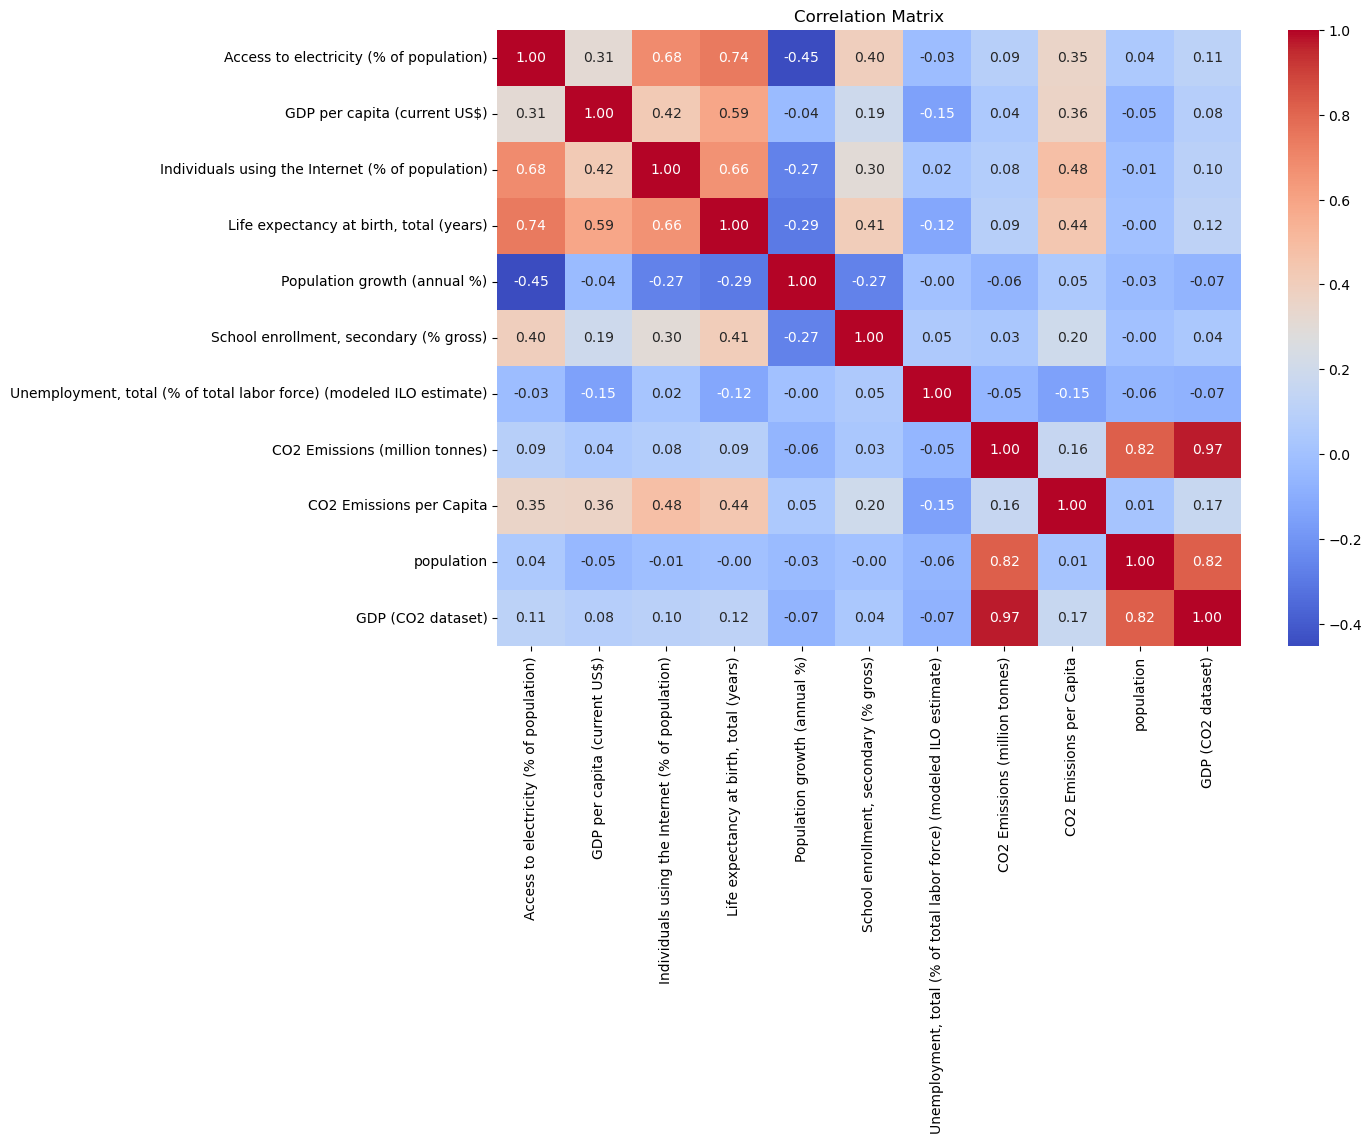

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 1. Univariate Analysis

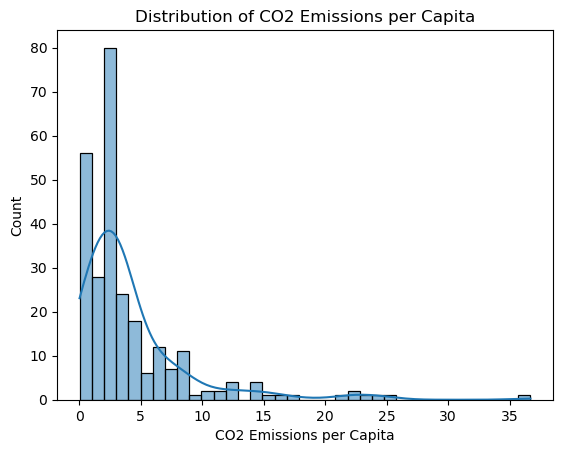

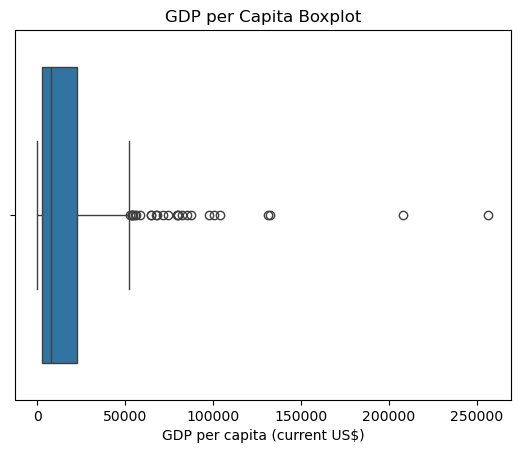

In [15]:
sns.histplot(df_final['CO2 Emissions per Capita'], kde=True)
plt.title('Distribution of CO2 Emissions per Capita')
plt.show()

sns.boxplot(x=df_final['GDP per capita (current US$)'])
plt.title('GDP per Capita Boxplot')
plt.show()


#### Graph: Histograms / Boxplots of individual indicators
##### Brief Analysis:

The distributions reveal strong right-skewness in GDP per capita and CO₂ emissions per capita, indicating a few countries dominate the upper end. Most countries have high electricity access and life expectancy, suggesting global progress in basic infrastructure.

## 2. Bivariate Analysis

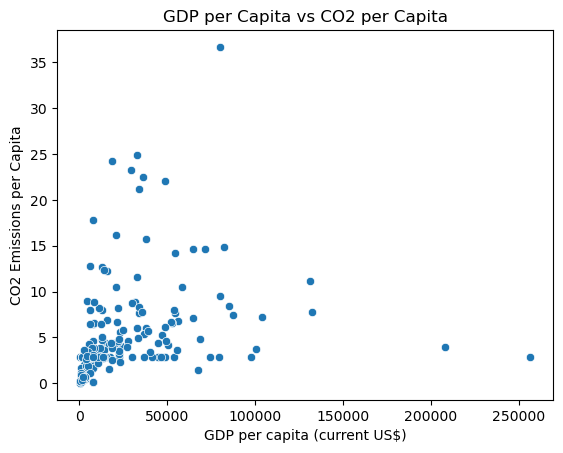

In [16]:
sns.scatterplot(data=df_final, x='GDP per capita (current US$)', y='CO2 Emissions per Capita')
plt.title('GDP per Capita vs CO2 per Capita')
plt.show()

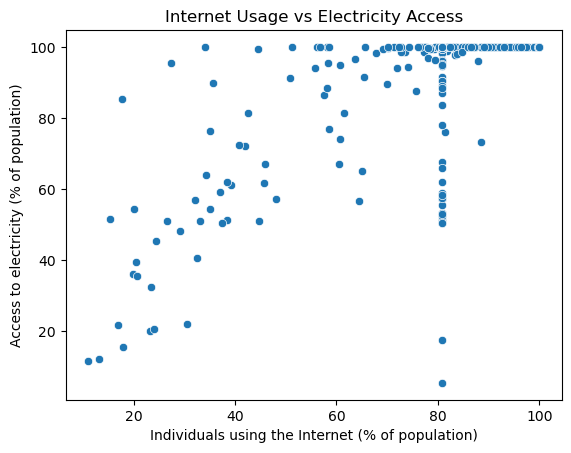

In [17]:
sns.scatterplot(data=df_final, x='Individuals using the Internet (% of population)', y='Access to electricity (% of population)')
plt.title('Internet Usage vs Electricity Access')
plt.show()

#### Graph: Scatterplots (e.g., GDP vs CO₂ per capita, Internet usage vs Electricity access)
##### Brief Analysis:

GDP per capita shows a positive correlation with CO₂ emissions per capita, suggesting wealthier countries tend to pollute more. Similarly, countries with high electricity access also report higher internet usage, reflecting digital inclusion.

## 3. Country-Level Comparisons

### Top 10 Countries

In [18]:
df_final[['Country Name', 'CO2 Emissions per Capita']].sort_values(by='CO2 Emissions per Capita', ascending=False).head(10)

,Country Name,CO2 Emissions per Capita
199,Qatar,36.699
31,Brunei Darussalam,24.934
242,Trinidad and Tobago,24.270
17,Bahrain,23.249
206,Saudi Arabia,22.481
250,United Arab Emirates,22.064
128,Kuwait,21.235
174,New Caledonia,17.815
184,Oman,16.195
212,Sint Maarten (Dutch part),15.755


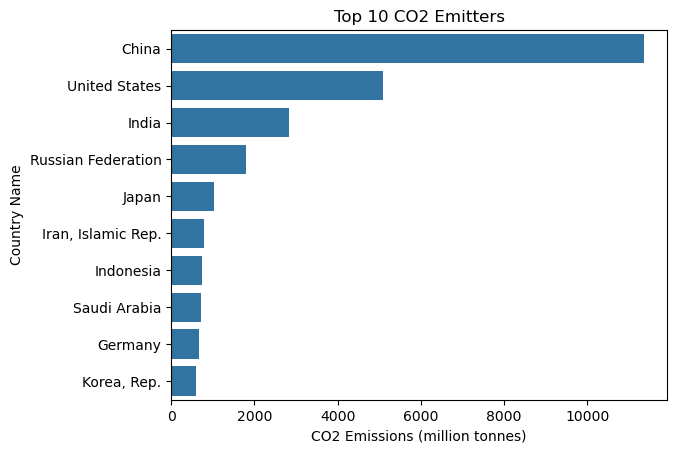

In [19]:
top10 = df_final.sort_values(by='CO2 Emissions (million tonnes)', ascending=False).head(10)
sns.barplot(data=top10, x='CO2 Emissions (million tonnes)', y='Country Name')
plt.title('Top 10 CO2 Emitters')
plt.show()

#### Graph: Barplot of top 10 countries by CO₂ emissions (absolute and per capita)
##### Brief Analysis:

The top CO₂ emitters in absolute terms are large economies like China, USA, and India. However, on a per capita basis, smaller nations like Qatar and Kuwait rank high due to high fossil fuel dependence despite smaller populations.

### Bottom 10 Countries

In [20]:
df_final[['Country Name', 'GDP per capita (current US$)']].sort_values(by='GDP per capita (current US$)').head(10)

,Country Name,GDP per capita (current US$)
34,Burundi,192.074305
0,Afghanistan,413.757895
262,"Yemen, Rep.",426.354076
41,Central African Republic,495.978897
148,Madagascar,508.718428
217,Somalia,597.458855
149,Malawi,602.343620
168,Mozambique,622.985619
49,"Congo, Dem. Rep.",633.395662
177,Niger,638.336081


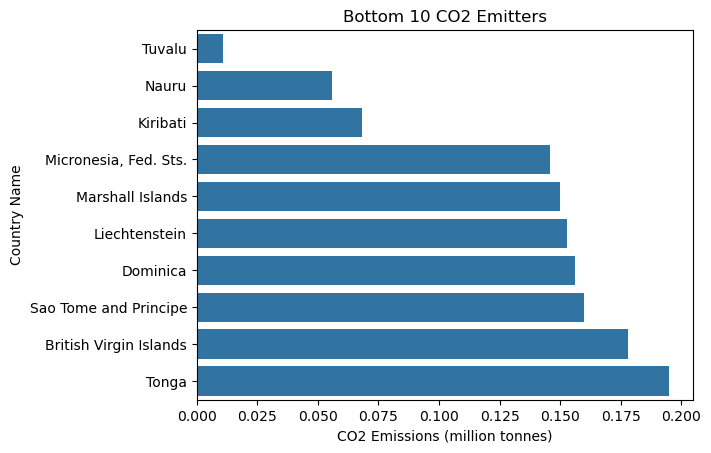

In [21]:
bottom10 = df_final.sort_values(by='CO2 Emissions (million tonnes)', ascending=True).head(10)
sns.barplot(data=bottom10, x='CO2 Emissions (million tonnes)', y='Country Name')
plt.title('Bottom 10 CO2 Emitters')
plt.show()

#### Graph: Barplot of bottom 10 countries by GDP per capita or CO₂ per capita
##### Brief Analysis:

The bottom 10 countries by GDP per capita and emissions are primarily low-income nations, often from Sub-Saharan Africa. These countries also tend to lag in internet usage, electricity access, and education, indicating development gaps.

## 4. Multivariate Insights

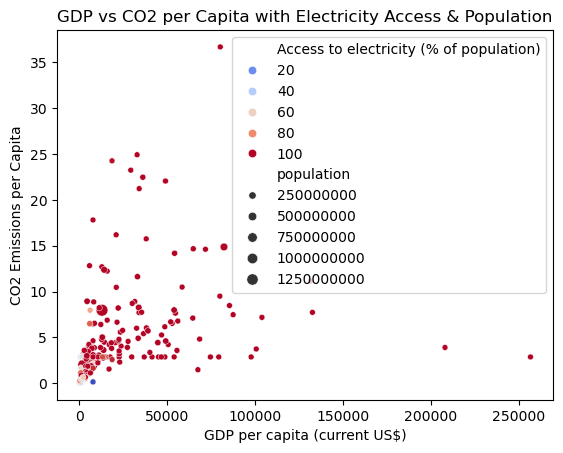

In [22]:
sns.scatterplot(
    data=df_final,
    x='GDP per capita (current US$)',
    y='CO2 Emissions per Capita',
    hue='Access to electricity (% of population)',
    size='population',
    palette='coolwarm'
)
plt.title('GDP vs CO2 per Capita with Electricity Access & Population')
plt.show()

#### Graph: Scatterplot with color/size encoding 3–4 variables
##### Brief Analysis:

Multivariate plots highlight clear clusters of countries: those with high GDP, high CO₂, and strong infrastructure, versus countries with lower development and minimal emissions. Population size further differentiates these groups.

# Advanced Exploratory Data Analysis

## PairPlots

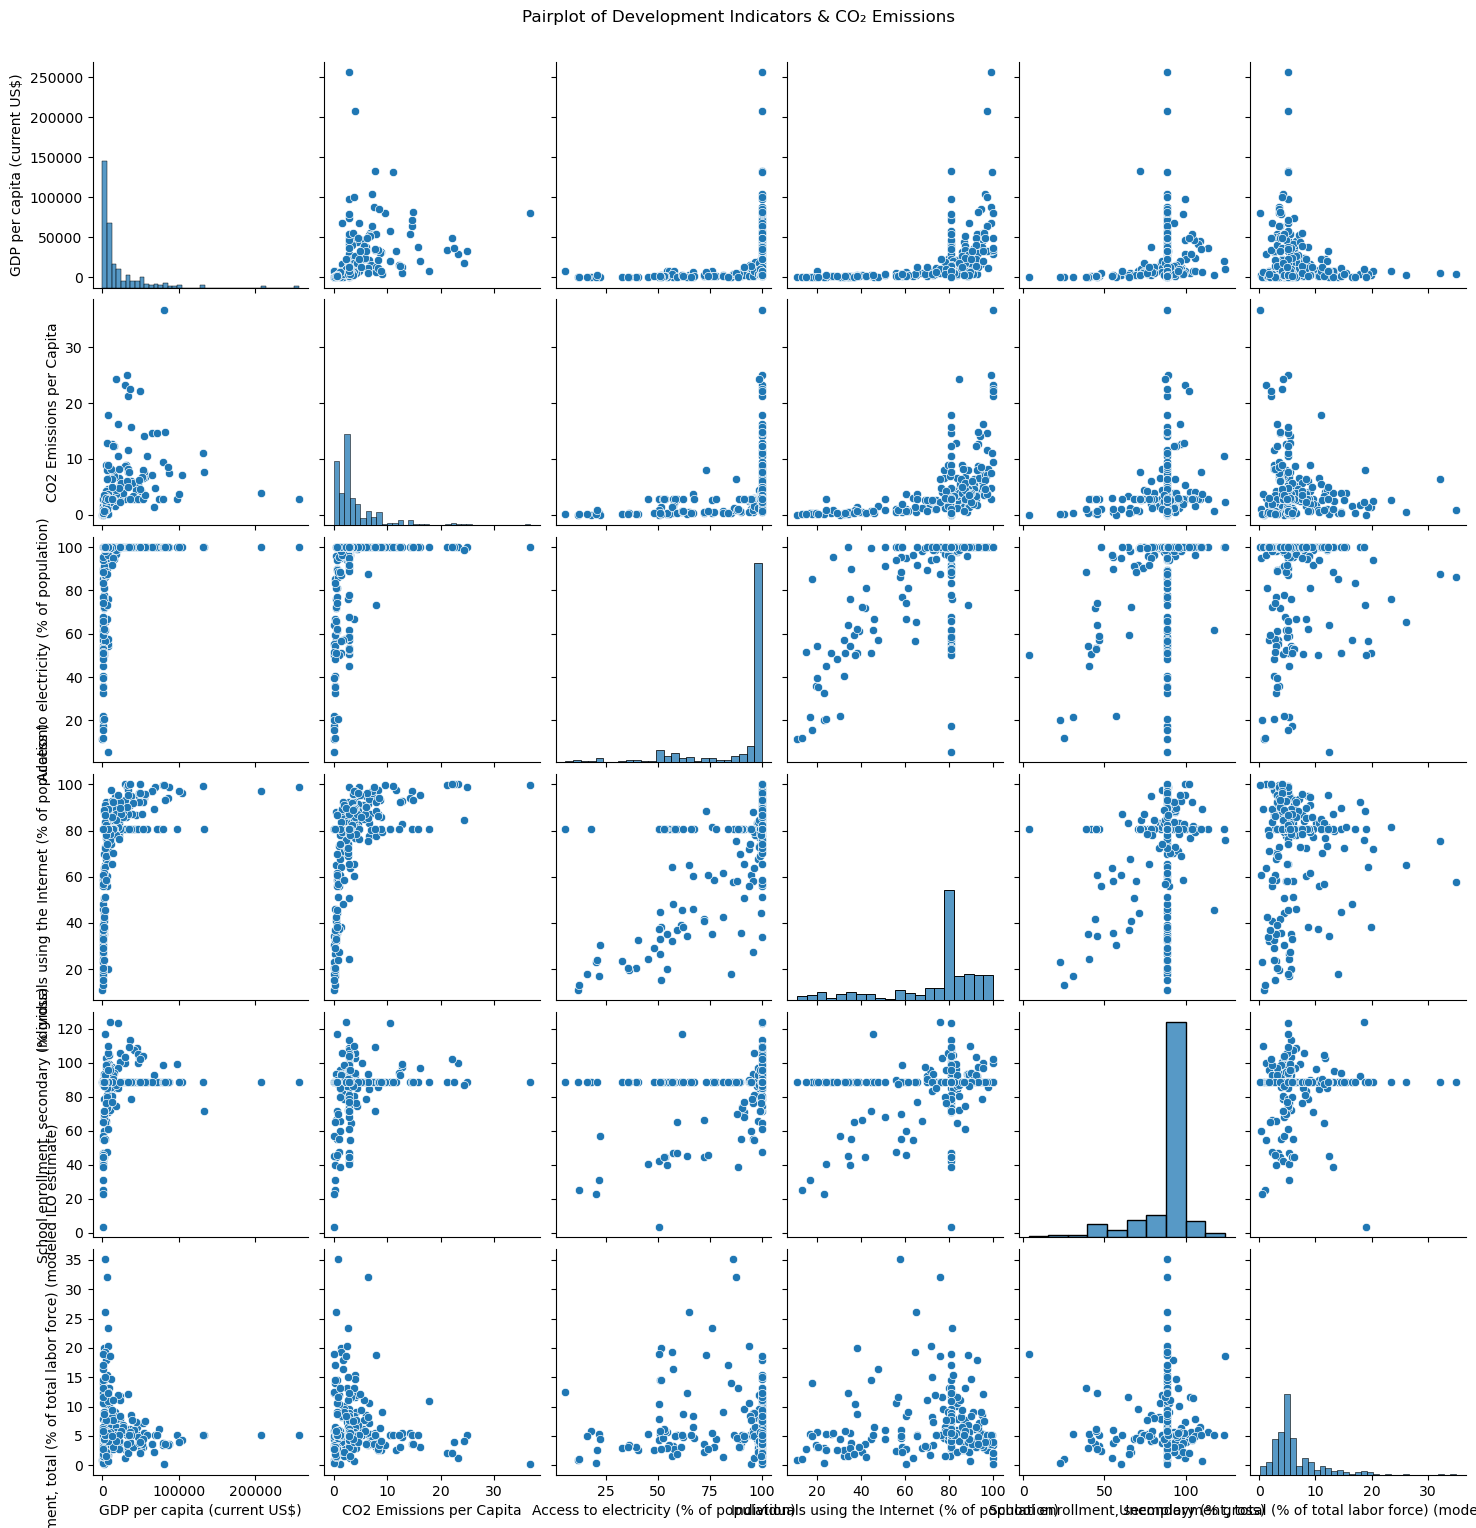

In [23]:
selected_cols = [
    'GDP per capita (current US$)',
    'CO2 Emissions per Capita',
    'Access to electricity (% of population)',
    'Individuals using the Internet (% of population)',
    'School enrollment, secondary (% gross)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

sns.pairplot(df_final[selected_cols])
plt.suptitle('Pairplot of Development Indicators & CO₂ Emissions', y=1.02)
plt.show()

#### Graph: Pairplot of selected numerical indicators
##### Brief Analysis:

The pairplot reveals strong linear relationships between GDP per capita, electricity access, and internet usage — indicators often associated with higher development. There’s also a noticeable cluster of high-GDP, high-emission countries, indicating co-movement of economic and environmental metrics.

## Principal Component Analysis Followed by KMeans Clustering

In [24]:
features = [
    'GDP per capita (current US$)',
    'CO2 Emissions per Capita',
    'Access to electricity (% of population)',
    'Individuals using the Internet (% of population)',
    'School enrollment, secondary (% gross)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

X = df_final[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Country Name'] = df_final['Country Name']

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_scaled)

D:\Installed\AnacondaNew\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


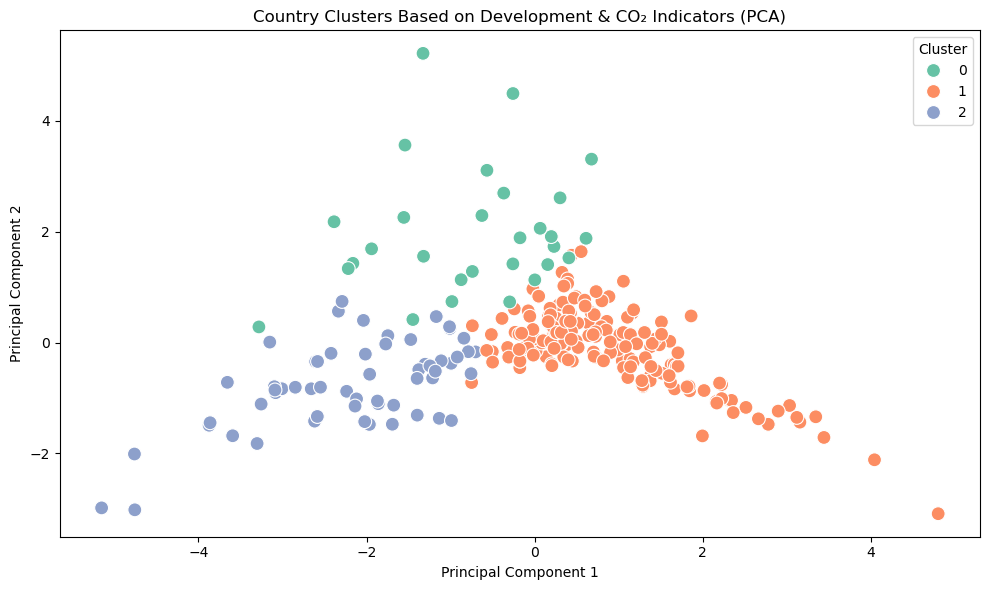

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Country Clusters Based on Development & CO₂ Indicators (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#### Graph: PCA scatterplot with KMeans clusters
##### Brief Analysis:

PCA reduced multiple indicators to two principal components capturing most variance. KMeans clustering revealed 3 distinct groups of countries based on development and emissions profiles, enabling targeted regional comparisons.

### Key Insights from EDA

##### 1. Key Patterns Observed
GDP per capita and CO₂ emissions per capita are positively correlated.

Countries with high internet usage and electricity access tend to have higher development indicators.

Countries with low CO₂ emissions often have lower GDP per capita.

##### 2. Clusters
Cluster 0: Developed, high CO₂ and GDP

Cluster 1: Emerging economies with moderate indicators

Cluster 2: Low-development countries with low emissions and access

##### 3. Top/Bottom Country Highlights
Top emitters: China, USA, India (in absolute CO₂)

Bottom GDP per capita: Sub-Saharan African countries

##### 4. Outliers
Some oil-rich countries show high CO₂ despite small populations (e.g., Qatar, Kuwait)

In [40]:
df_filtered = df_final[df_final['CO2 Emissions per Capita'] < 20]

In [46]:
df_filtered.to_csv('cleaned_worldbank_co2.csv', index=False)

# Project Summary
In this project, development indicators (such as GDP per capita, life expectancy, internet usage, etc.) were analyzed to understand their relationship with CO₂ emissions per capita. An initial exploratory data analysis (EDA) was performed on the complete dataset, highlighting significant variance and the presence of outliers in emission values across countries.

To improve model performance, countries with CO₂ emissions per capita greater than 20 tonnes were filtered out. The cleaned dataset was then exported to a CSV file and used for modeling in KNIME, a low-code platform.

#### A Linear Regression model was trained using the filtered dataset in KNIME. The model achieved:
#### R² = 0.476
#### Mean Absolute Error ≈ 1.53
#### Root Mean Squared Error ≈ 2.10

This indicates that the development indicators explained ~47.6% of the variation in CO₂ emissions per capita within the cleaned data, showing significant improvement over earlier results on unfiltered data.

**Low-Code Model Summary (KNIME)**

- Tool: KNIME Analytics Platform
- Model: Linear Regression
- Input: Cleaned dataset (CO₂ emissions per capita < 20)
- Steps:
  - Data reader (CSV)
  - Column filter (to remove non-numeric columns)
  - Linear Regression Learner
  - Predictor
  - Numeric Scorer
- R² score: 0.476


<h3> KNIME Workflow Overview</h3>
<p>Below is the KNIME regression pipeline:</p>
<img src="KNIME ss.png" width="700"/>